## Analise Exploratoria do Sales Data

In [45]:
#imports de biblioteca
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sqlalchemy import create_engine
from sqlalchemy.exc import OperationalError
from sqlalchemy_utils import create_database

### Carregamento do dataframe de dados de vendas

In [2]:
#carregamento da base de dados de sales_data
df_sales = pd.read_excel('../data/sales_data.csv.xlsx')


In [3]:
df_sales

,order_id,product_name,quantity,unit_price,cliente_id,order_date
0,1,Produto A,3,25,74,2024-03-01
1,2,Produto B,2,30,36,2024-03-02
2,3,Produto C,1,20,12,2024-03-03
3,4,Produto A,4,25,92,2024-03-04
4,5,Produto D,2,40,55,2024-03-05
...,...,...,...,...,...,...
95,96,Produto C,2,20,29,2024-06-04
96,97,Produto D,3,40,76,2024-06-05
97,98,Produto A,1,25,97,2024-06-06
98,99,Produto B,2,30,50,2024-06-07


#### Pré-processamento dos dados

- Alteração do nome das colunas

In [4]:
#Verificação do nome das colunas
df_sales.columns

Index(['order_id', 'product_name', 'quantity', 'unit_price', 'cliente_id',
       'order_date'],
      dtype='object')

In [5]:
#realização da troca de nome de colunas passando o nome antigo e o novo e utilizando o inplace
df_sales.rename(columns={'order_id':'id_compra','product_name':'produto',
                         'quantity':'quantidade','unit_price':'preco_unitario',
                         'cliente_id':'id_cliente','order_date':'data_pedido'}, inplace=True)

In [6]:
df_sales.columns

Index(['id_compra', 'produto', 'quantidade', 'preco_unitario', 'id_cliente',
       'data_pedido'],
      dtype='object')

- verificação de tipos de dados

In [7]:
df_sales.dtypes

id_compra                  int64
produto                   object
quantidade                 int64
preco_unitario             int64
id_cliente                 int64
data_pedido       datetime64[ns]
dtype: object

- verificação de nulos

In [8]:
df_sales.isnull().sum()

id_compra         0
produto           0
quantidade        0
preco_unitario    0
id_cliente        0
data_pedido       0
dtype: int64

- verficação de duplicatas

In [9]:
df_sales.duplicated().sum()

0

- resumo geral do dataframe 

In [10]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_compra       100 non-null    int64         
 1   produto         100 non-null    object        
 2   quantidade      100 non-null    int64         
 3   preco_unitario  100 non-null    int64         
 4   id_cliente      100 non-null    int64         
 5   data_pedido     100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 4.8+ KB


#### Descrição dos dados

In [11]:
print(f'tamanho: {df_sales.shape}')
print(f'atributos: {df_sales.columns}')

tamanho: (100, 6)
atributos: Index(['id_compra', 'produto', 'quantidade', 'preco_unitario', 'id_cliente',
       'data_pedido'],
      dtype='object')


### Perguntas:

-  Qual a média de venda de cada produto?
-  Quais produtos são os mais comprados?
-  Quanto o produto mais caro arrecadou?
-  Quais produtos clientes compraram mais de 1 produto e quais produtos foram comprados?
-  Qual foi o mês com o maior rentabilidade?

#### Qual a media de venda de cada produto?

a média de venda dos produtos são:

| produto | média | mediana | quantidade |
|------|------|------|------|
| Produto A  |  2.346154 | 2.0 | 61 |
| Produto B  |  2.400000 | 2.0 | 60 |
| Produto C  |  2.400000 | 2.0 | 60 |
| Produto D  |  2.208333 | 2.0 | 53 |




In [12]:
#agrupamento pela coluna product_name 
product_group = df_sales.groupby(['produto'])

Text(0.5, 1.0, 'Boxplot de Quantidade')

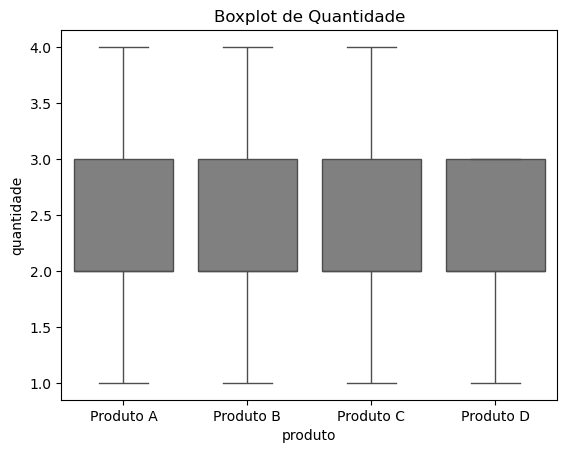

In [13]:
sns.boxplot(data=df_sales,y='quantidade',x='produto', color='gray').set_title('Boxplot de Quantidade')

In [14]:
media_produtos = product_group['quantidade'].mean()
media_produtos

produto
Produto A    2.346154
Produto B    2.400000
Produto C    2.400000
Produto D    2.208333
Name: quantidade, dtype: float64

In [15]:
median_produtos = product_group['quantidade'].median()
median_produtos

produto
Produto A    2.0
Produto B    2.0
Produto C    2.0
Produto D    2.0
Name: quantidade, dtype: float64

In [16]:
product_group['quantidade'].sum()

produto
Produto A    61
Produto B    60
Produto C    60
Produto D    53
Name: quantidade, dtype: int64

#### Quais são os produtos mais comprados?

O produto mais comprado é o Produto A, a quantidade de venda de produtos é bem proxima entre sí, em segundo lugar vem os produtos B e C e em ultimo o Produto D

In [17]:
qtd_compra = product_group['quantidade'].sum()
qtd_compra


produto
Produto A    61
Produto B    60
Produto C    60
Produto D    53
Name: quantidade, dtype: int64

#### Qual o produto mais caro e o quanto o produto arrecadou?

O produto mais caro é o Produto D, com uma arrecadação total de 2120,0. Apesar de ser o produto com maior arrecadação, o Produto D é o que possui o menor numero de vendas: 53.

In [18]:
#soma da quantidade de produtos agrupado por cada tipo de produto aloado na variavel qtd
qtd = product_group['quantidade'].sum()
#media de preço dos produtos agrupado por cada tipo de produto calculado na variavel preco
preco = product_group['preco_unitario'].mean()
#calculo de qtd x preço e alocado o resultado no valor_arrecadação
valor_arrecadado = qtd * preco

valor_arrecadado


produto
Produto A    1525.0
Produto B    1800.0
Produto C    1200.0
Produto D    2120.0
dtype: float64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Produto A'),
  Text(1, 0, 'Produto B'),
  Text(2, 0, 'Produto C'),
  Text(3, 0, 'Produto D')])

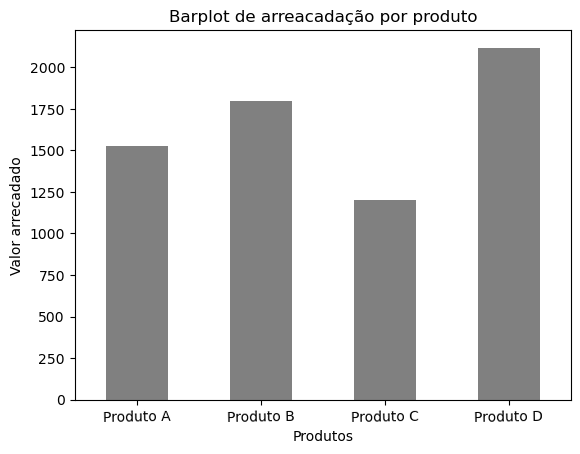

In [19]:
#plot do grafico de tipo barras para a arrecadação por produto
valor_arrecadado.plot(kind='bar', color='gray').set(xlabel='Produtos', ylabel='Valor arrecadado', title='Barplot de arreacadação por produto')
#orientação da exibição do texto da barra
plt.xticks(rotation=1)

 Quais produtos clientes compraram mais de 1 produto e quais produtos foram comprados?

In [20]:
#Agrupamento de clientes que possuem mais de uma compra 
agrupar_clientes = df_sales['id_cliente'].value_counts()[df_sales['id_cliente'].value_counts() > 1]

#criação de filtro  de cliente_id do dataframe df_sales, verificando se o valor se encontra no
#index de agrupar_clientes
clientes_filter = df_sales[df_sales['id_cliente'].isin(agrupar_clientes.index)]

#Agrupamento de clientes_filter pelo cliente_id e a coluna product_name associada ao cliente_id
grupo_clientes_produtos = clientes_filter.groupby('id_cliente')['produto']

#Aplicação de tipo lista e reset de index para o product_name
grupo_clientes_produtos = grupo_clientes_produtos.apply(list).reset_index(name='produto')

In [21]:
grupo_clientes_produtos

,id_cliente,produto
0,3,"[Produto B, Produto C]"
1,6,"[Produto D, Produto B, Produto B]"
2,8,"[Produto A, Produto A, Produto D]"
3,12,"[Produto C, Produto B, Produto C]"
4,27,"[Produto B, Produto B, Produto C]"
5,36,"[Produto B, Produto A]"
6,39,"[Produto C, Produto A, Produto C]"
7,42,"[Produto D, Produto C]"
8,45,"[Produto D, Produto A]"
9,50,"[Produto B, Produto C, Produto B]"


 Qual foi o mês com o maior rentabilidade?

O mês com a maior rentabilidade foi o mês de Maio, seguido do mês de Março por uma diferença de 15, como mostrado no gráfico nas proximas sessões.
| mês | receita |
|-----|-----|
| Mar  |  2050,0 |
| Abr  |  1995,0 |
| Mai  |  2065,0 |
| Jun  |   535,0 |


O mês que possuí o menor rendimento atualmente é o mês de junho, levando em considaração que os dados disponiveis para o mês de junho só vão ate dia 8.
Se levarmos em conta os dados de Março à Maio a media de valores é 2036,66 e a mediana é 2050, é provavel que o mês de Junho consiga atingir os valores proximos a mediana.



In [22]:
# Agrupamento e soma de quantidade pelo nome do produto e mês
soma_qt_meses = df_sales.groupby(['produto', df_sales['data_pedido'].dt.month])['quantidade'].sum()
#calculo da receita gerado pela venda dos produtos
valor_arrecadado_mensal = soma_qt_meses * preco
#Copia do pd.Series e transformado em um dataframe
valor_arrecadado_mensal_cp = valor_arrecadado_mensal.to_frame()

#resetando a index do dataframe
valor_arrecadado_mensal_cp = valor_arrecadado_mensal_cp.reset_index()
#renomeando as colunas 0 para receita e order_date para mês
valor_arrecadado_mensal_cp = valor_arrecadado_mensal_cp.rename(columns={0: 'receita', 'data_pedido':'mes'})
valor_arrecadado_mensal_cp 


,produto,mes,receita
0,Produto A,3,550.0
1,Produto A,4,375.0
2,Produto A,5,525.0
3,Produto A,6,75.0
4,Produto B,3,540.0
5,Produto B,4,540.0
6,Produto B,5,540.0
7,Produto B,6,180.0
8,Produto C,3,320.0
9,Produto C,4,400.0


In [23]:
#mapeamento dos meses com seus valores numericos
mapping = {1:'Jan', 2:'Fev', 3:'Mar', 4:'Abr', 5:'Mai', 
           6:'Jun', 7:'Jul', 8:'Ago', 9:'Set', 10:'Out', 11:'Nov', 12:'Dez'}
#aplicação do mapeamento
valor_arrecadado_mensal_cp['mes'] = valor_arrecadado_mensal_cp['mes'].map(mapping)

In [24]:
#agrupamento mensal e soma dos valores de arrecadação mensal 
valor_max = valor_arrecadado_mensal_cp.groupby('mes')['receita'].sum()
valor_max

mes
Abr    1995.0
Jun     535.0
Mai    2065.0
Mar    2050.0
Name: receita, dtype: float64

In [25]:
valor_max.describe()

count       4.000000
mean     1661.250000
std       751.436125
min       535.000000
25%      1630.000000
50%      2022.500000
75%      2053.750000
max      2065.000000
Name: receita, dtype: float64

In [26]:
#agrupamento mensal excluindo o mês de Junho para a realização da soma e 
# descrição do grupo para pegar a média e a mediana
df_valor_calculo = valor_arrecadado_mensal_cp[valor_arrecadado_mensal_cp['mes'] != 'Jun']
valor_calculo = df_valor_calculo.groupby('mes')['receita'].sum()
valor_calculo.describe()

count       3.000000
mean     2036.666667
std        36.855574
min      1995.000000
25%      2022.500000
50%      2050.000000
75%      2057.500000
max      2065.000000
Name: receita, dtype: float64

[Text(0.5, 0, 'Produto'),
 Text(0, 0.5, 'Receita'),
 Text(0.5, 1.0, 'Receita Mensal')]

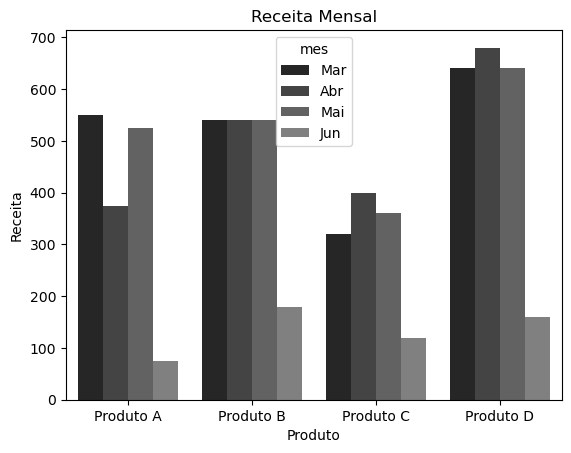

In [27]:
sns.barplot(x='produto', y='receita', hue='mes', data=valor_arrecadado_mensal_cp, palette='dark:gray').set(xlabel='Produto', ylabel='Receita', title='Receita Mensal')

existem padrões nas receitas dos produtos
A receita gerada pelo produto B se manteve constante durante os meses de Março à Maio
A receita gerada pelo produto D manteve o valor no intervalo de 1 mês (Março e Maio geraram a mesma quantidade de lucro)
Os produtos A e C possuiem uma variancia de lucro por meses

### Carregamento do dataframe com dados do cliente

In [28]:
#carregamento da base de dados de clientes
df_clientes = pd.read_excel("../data/customer_data.xlsx")
df_clientes.head()

,id_cliente,nome,sobrenome,email,telefone,endereço,numero
0,1,João,Silva,joao.silva@email.com,(11) 1234-5678,Rua das Flores,123
1,2,Maria,Santos,maria.santos@email.com,(11) 2345-6789,Avenida Principal,456
2,3,Carlos,Rocha,carlos.rocha@email.com,(11) 3456-7890,Travessa das Árvores,789
3,4,Ana,Costa,ana.costa@email.com,(11) 4567-8901,Rua dos Passarinhos,987
4,5,Luiz,Oliveira,luiz.oliveira@email.com,(11) 5678-9012,Alameda das Rosas,654


Quais são os endereços que mais tem clientes na base de dados? 

o top 5 de endereço com mais clientes é:

| Endereço | QTD |
|--------------------------|---|
| Rua dos Girassóis        | 7 |
| Rua das Violetas         | 6 |
| Avenida dos Narcisos     | 5 |
| Alameda dos Crisântemos  | 5 |
| Travessa das Tulipas     | 5 |

abaixo é mostrado o metodo que gerou os dados da tabela acima

In [29]:
#criação do agrupamento de endereço de cliente pelo tamanho/quantidade que se repete
agrupado_endereco = df_clientes.groupby('endereço').size()
agrupado_endereco

endereço
Alameda das Hortênsias     1
Alameda das Orquídeas      1
Alameda das Rosas          1
Alameda dos Cravos         4
Alameda dos Crisântemos    5
Alameda dos Ipês           2
Alameda dos Jasmins        1
Alameda dos Lírios         3
Alameda dos Manacás        2
Avenida Principal          1
Avenida das Amoras         1
Avenida dos Cravos         3
Avenida dos Crisântemos    1
Avenida dos Flamboyants    2
Avenida dos Girassóis      1
Avenida dos Jardins        2
Avenida dos Jasmins        3
Avenida dos Lírios         1
Avenida dos Narcisos       5
Praça Central              1
Praça das Flores           1
Praça das Orquídeas        1
Praça das Tulipas          1
Praça dos Jardins          3
Praça dos Lírios           3
Quadra 10                  1
Quadra 11                  1
Quadra 2                   1
Quadra 3                   1
Quadra 4                   1
Quadra 5                   1
Quadra 6                   1
Quadra 7                   1
Quadra 8                   1
Quadr

In [30]:
#filtro de agrupamento pegando todos os valorees de endereço acima de 1 e ordenando do maior para o menor 
#e mostrando os 5 com maior quantidade
agrupado_endereco_aux = agrupado_endereco[agrupado_endereco>1].sort_values(ascending=False).head(5)
agrupado_endereco_aux

endereço
Rua dos Girassóis          7
Rua das Violetas           6
Avenida dos Narcisos       5
Alameda dos Crisântemos    5
Travessa das Tulipas       5
dtype: int64

<Axes: title={'center': 'Endereços com maior Clientes'}, xlabel='Endereço', ylabel='Nº de Clientes'>

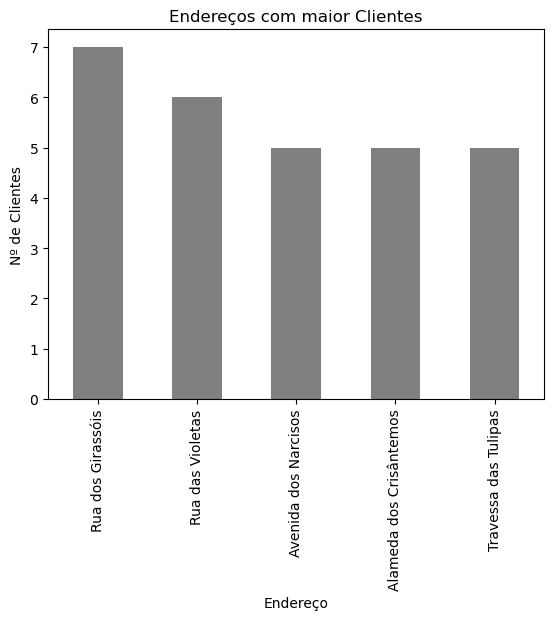

In [31]:
agrupado_endereco_aux.plot.bar(xlabel='Endereço', ylabel='Nº de Clientes', title='Endereços com maior Clientes', color='gray')


#### Criação do dataframe da união das duas bases de dados: Sales e Customer
- sales: df_sales
- customer: df_clientes 

In [32]:
df_sales.columns

Index(['id_compra', 'produto', 'quantidade', 'preco_unitario', 'id_cliente',
       'data_pedido'],
      dtype='object')

In [33]:
df_clientes.columns

Index(['id_cliente', 'nome', 'sobrenome', 'email', 'telefone', 'endereço',
       'numero'],
      dtype='object')

In [34]:
df_venda_clientes = pd.merge(df_sales, df_clientes, on='id_cliente')
df_venda_clientes

,id_compra,produto,quantidade,preco_unitario,id_cliente,data_pedido,nome,sobrenome,email,telefone,endereço,numero
0,1,Produto A,3,25,74,2024-03-01,Diego,Souza,diego.souza@email.com,(11) 4567-8901,Rua dos Girassóis,654
1,2,Produto B,2,30,36,2024-03-02,Isabela,Rodrigues,isabela.rodrigues@email.com,(11) 6789-0123,Quadra 5,321
2,3,Produto C,1,20,12,2024-03-03,Beatriz,Martins,beatriz.martins@email.com,(11) 2345-6789,Avenida dos Lírios,987
3,4,Produto A,4,25,92,2024-03-04,Marcelo,Silva,marcelo.silva@email.com,(11) 2345-6789,Avenida dos Narcisos,654
4,5,Produto D,2,40,55,2024-03-05,Felipe,Gomes,felipe.gomes@email.com,(11) 5678-9012,Alameda dos Crisântemos,987
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Produto C,2,20,29,2024-06-04,Rodrigo,Silveira,rodrigo.silveira@email.com,(11) 9012-3456,Avenida das Amoras,654
96,97,Produto D,3,40,76,2024-06-05,Jessica,Fernandes,jessica.fernandes@email.com,(11) 6789-0123,Quadra 9,987
97,98,Produto A,1,25,97,2024-06-06,Larissa,Gonçalves,larissa.goncalves@email.com,(11) 7890-1234,Praça dos Jardins,987
98,99,Produto B,2,30,50,2024-06-07,Vanessa,Silva,vanessa.silva@email.com,(11) 0123-4567,Alameda dos Cravos,654


In [35]:
df_venda_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_compra       100 non-null    int64         
 1   produto         100 non-null    object        
 2   quantidade      100 non-null    int64         
 3   preco_unitario  100 non-null    int64         
 4   id_cliente      100 non-null    int64         
 5   data_pedido     100 non-null    datetime64[ns]
 6   nome            100 non-null    object        
 7   sobrenome       100 non-null    object        
 8   email           100 non-null    object        
 9   telefone        100 non-null    object        
 10  endereço        100 non-null    object        
 11  numero          100 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 9.5+ KB


### Lançamento do novo Dataframe no Banco MYSQL

In [36]:
#variaveis para montagem da url do banco de dados mysql
MYSQL_HOST = "localhost"
MYSQL_PORT = 3306  
MYSQL_USER = "######" #altere aqui para seu usuario do banco de dados
MYSQL_PASSWORD = "######" #altere aqui e insira sua senha do banco de dados
MYSQL_DB = "bancovendas"

In [37]:
#try except para a criação do banco de dados no mysql
try:
  url_db = f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DB}"
  create_database(url_db)
  print("banco criado")
except OperationalError as e:
  print(f"erro : {e}")


banco criado


In [38]:
#criação da engine para conectar ao banco e realizar o lançamento do dataframe no mysql
engine = create_engine(url_db)

In [39]:
#lançamento do dataframe no mysql, a estrutura da tabela do banco vai ser herdada
#do dataframe, ao rodar mostra a quantidade de linhas carregadas
df_venda_clientes.to_sql("dadosvenda", engine, index=False)

100

#### teste de conexão

In [40]:
#select para retornar tudo
consulta_sql = "SELECT * FROM dadosvenda;"

In [41]:
df_consulta= pd.read_sql(consulta_sql, engine)

In [42]:
df_consulta

,id_compra,produto,quantidade,preco_unitario,id_cliente,data_pedido,nome,sobrenome,email,telefone,endereço,numero
0,1,Produto A,3,25,74,2024-03-01,Diego,Souza,diego.souza@email.com,(11) 4567-8901,Rua dos Girassóis,654
1,2,Produto B,2,30,36,2024-03-02,Isabela,Rodrigues,isabela.rodrigues@email.com,(11) 6789-0123,Quadra 5,321
2,3,Produto C,1,20,12,2024-03-03,Beatriz,Martins,beatriz.martins@email.com,(11) 2345-6789,Avenida dos Lírios,987
3,4,Produto A,4,25,92,2024-03-04,Marcelo,Silva,marcelo.silva@email.com,(11) 2345-6789,Avenida dos Narcisos,654
4,5,Produto D,2,40,55,2024-03-05,Felipe,Gomes,felipe.gomes@email.com,(11) 5678-9012,Alameda dos Crisântemos,987
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Produto C,2,20,29,2024-06-04,Rodrigo,Silveira,rodrigo.silveira@email.com,(11) 9012-3456,Avenida das Amoras,654
96,97,Produto D,3,40,76,2024-06-05,Jessica,Fernandes,jessica.fernandes@email.com,(11) 6789-0123,Quadra 9,987
97,98,Produto A,1,25,97,2024-06-06,Larissa,Gonçalves,larissa.goncalves@email.com,(11) 7890-1234,Praça dos Jardins,987
98,99,Produto B,2,30,50,2024-06-07,Vanessa,Silva,vanessa.silva@email.com,(11) 0123-4567,Alameda dos Cravos,654


Qual é o cliente de id 35 e o que ele comprou e quando?

In [43]:
consulta_sql = "SELECT nome, sobrenome, produto, data_pedido FROM dadosvenda WHERE dadosvenda.id_cliente	= 35;"
df_resultado_sql = pd.read_sql(consulta_sql, engine)
df_resultado_sql

,nome,sobrenome,produto,data_pedido
0,Fabio,Santana,Produto B,2024-05-18


Quais clientes moram na Rua dos Girassóis?

In [44]:
consulta_sql = "SELECT nome, sobrenome FROM dadosvenda WHERE dadosvenda.endereço = 'Rua dos Girassóis';"
df_resultado_sql = pd.read_sql(consulta_sql, engine)
df_resultado_sql

,nome,sobrenome
0,Diego,Souza
1,Jorge,Moreira
2,Silvia,Moreira
3,Juliana,Monteiro
4,Douglas,Souza


#### Sumário

- A media de venda de produtos é aproximado 
- O produto com a menor venda foi o responsável pelo maior faturamento
- É provavel que o faturamento do mês de Junho atinja valores entre a média e mediana
- Cerca de 21% dos clientes compram mais de um produto
- O produto B é o que possuí faturamento mais estável
- O produto D gerou a maior renda mesmo com o menor número de vendas
- A região que mais possui clientes é a Rua dos Girassóis 